# Cálculo de histogramas: implementação e discussões

## Introdução

Chama-se de histograma de uma imagem a relação entre os valores de intensidade da mesma ($r[k]$) e número de pixels associados ($n[k]$), onde $k$ representa o $k$-ésimo valor de intensidade contido no intervalo $0 \leq k \leq L-1$, com L sendo o máximo valor de intesidade de acordo com a resolução da imagem. Tal relação é expressa graficamente na forma de uma distrbuição($h[r[k]]$), no qual seu eixo vertical possui a quantidade de pixels associada ao valor de intensidade disposto no eixo horizontal. Segue um exemplo de histograma.

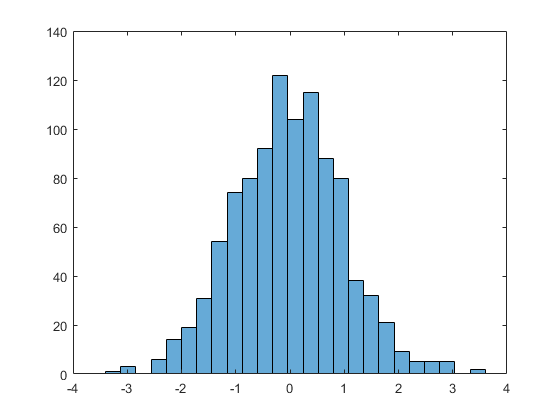

In [1]:
from IPython.display import Image
Image(filename='histogram.png')

É importante destacar que histogramas podem ser normalizados se forem divididos pelo tamanho($M x N$) da imagem. Dessa forma a novo histogramo representará a probabilidade($p[r[k]]$) de determinado pixel possuir intensidade $r[k]$

Exemplo de histograma normalizado e função da distrbuição de densidade de probabilidade: 


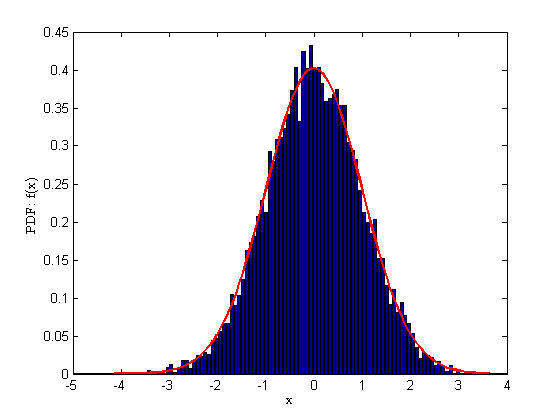

In [2]:
print("Exemplo de histograma normalizado e função da distrbuição de densidade de probabilidade: ")
Image(filename='histogram02.png')

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [4]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir tamanho do kernel utilizado
- Definir número de aplicações do filtro

In [5]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

### Aplicação efetida do método:

In [6]:
#############################################################################################
########### Method apllication:

Hist = nf.calcHist(Filter.img)

################################
Process finished
Histogram has been calculated
################################


### Exibir resultados:

- Imagem original:

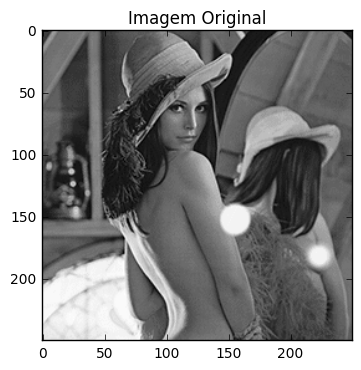

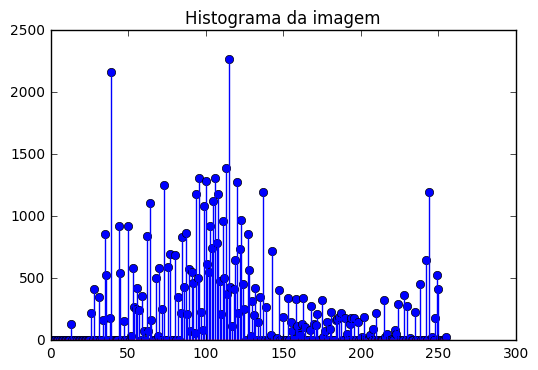

In [7]:
#############################################################################################
########## Plot images:

########## Using matplotlib #################
plt.figure(1)
#plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Imagem Original')

#plt.subplot(122)
plt.figure(2)
plt.stem(Hist)
plt.title('Histograma da imagem')
plt.show()

#### Apêndice 01 - Função para cálculo do histograma:

In [8]:
def calcHist (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Calculate Histogram
    ## Pre-setes:
    if A.dtype == 'uint8':
        buffer = np.zeros((256))

    ## Read the intire matrix element-by-element:

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):

            buffer[(A[j,k])] += 1

    print('################################')
    print('Process finished')
    print('Histogram has been calculated')
    print('################################')

    return buffer

# Discussões sobre o método

Percebe-se que a a distribuição do histograma de uma imagem está diretamente relacionado com a intensidade de cor dominante na mesma, traduzida para a escala de cinza como a distribuição entre pretos e brancos, os exemplos a seguir ilustram o descrito.

## Imagem com predominância de cores pretas:

Aplicação do filtro de Sobel em na imagem:
################################
Process finished
Filter have been applied
################################


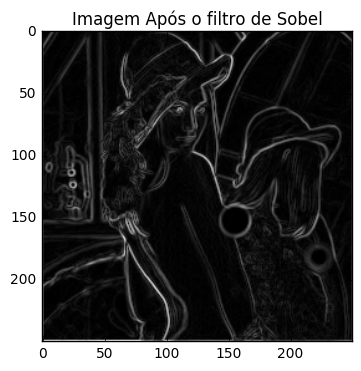

In [9]:
print("Aplicação do filtro de Sobel em na imagem:")

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

# Kernel def:

Filter.kernelSize = 3

numAp = 1;
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

U = nf.filterSobel(Filter)

plt.imshow(U, 'gray')
plt.title('Imagem Após o filtro de Sobel')
plt.show()

- Cálculo do Histograma:

################################
Process finished
Histogram has been calculated
################################


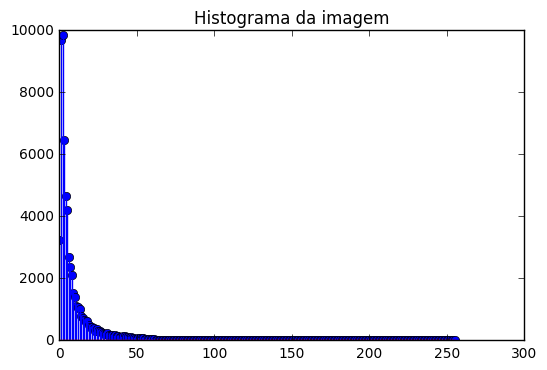

In [10]:
Filter.img = U
Hist = nf.calcHist(Filter.img)

plt.figure(2)
plt.stem(Hist)
plt.title('Histograma da imagem')
plt.show()

O resultado da aplicação do filtro de Sobel provê uma imagem com bastante tons de escuros, devido a característica do método, logo é fácil de perceber a concentração(número de pixels) em tons próximos de preto.

## Imagem com predominância de cores brancas:

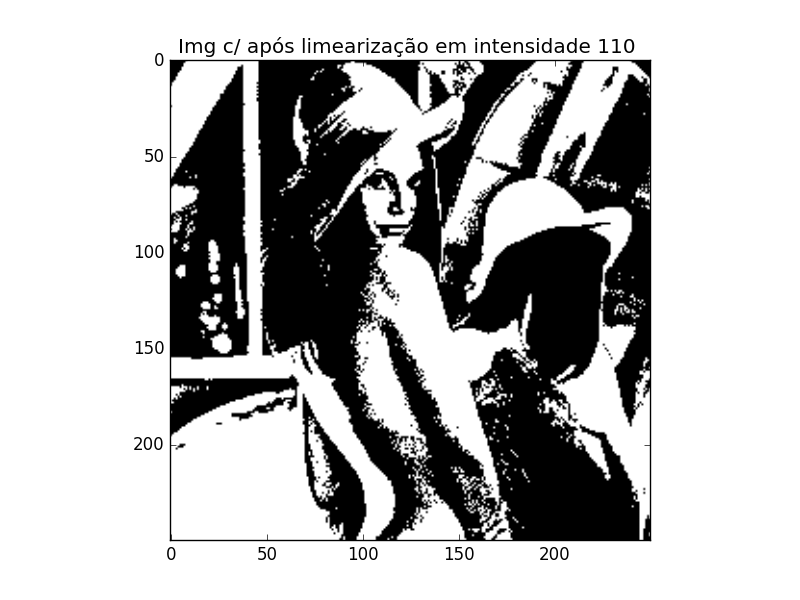

In [11]:
Image(filename='lena-limiar.png')

################################
Process finished
Histogram has been calculated
################################


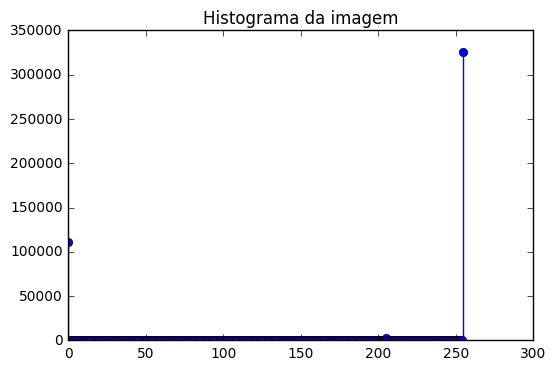

In [12]:
Filter.img = cv2.imread('lena-limiar.png',cv2.IMREAD_GRAYSCALE)

Hist = nf.calcHist(Filter.img)

plt.figure(1)
plt.stem(Hist)
plt.title('Histograma da imagem')
plt.show()

Após a aplicação do limiarização os pixesl de valores maiores que o limiar foram atribuídos a intendidade máxima da imagem, e isto é notável ao visualizar o histograma da mesma, há uma grande concentração de pixels em tonalidade brancas.

# Conclusões

O cálculo de histogramas é uma importante ferramente visual para identificação de padrões de tonalidade da imagem, é possível identificar predôminância de sombras(imagens escuras ou com pouco contraste) ou o contrário, como também identificar imagens equalizadas, que devem possuir um histograma com distribuição bastante homogênea.